# Lab 7 Data Analysis
Group: IP-91

Var: 6

Students:
- Geleshko D.
- Vlasov A.

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor

## Config

In [2]:
np.random.seed(6)

plt.rcParams["figure.figsize"] = (16, 8)

pd.set_option("display.max_columns", None)
pd.options.display.float_format ="{:,.3f}".format

# Load Data

In [3]:
df = pd.read_csv("../data/merc.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.100,1.800
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.400,2.100
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.000,5.500
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.400,4.000
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.100,4.000
...,...,...,...,...,...,...,...,...,...
1497,V Class,2018,21996,Manual,32095,Diesel,145,46.300,2.100
1498,V Class,2018,19346,Manual,34483,Diesel,150,46.300,2.100
1499,V Class,2019,20391,Automatic,18812,Diesel,150,48.700,2.100
1500,GLA Class,2019,20995,Manual,6587,Petrol,145,40.900,1.600


# Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1502 non-null   object 
 1   year          1502 non-null   int64  
 2   price         1502 non-null   int64  
 3   transmission  1502 non-null   object 
 4   mileage       1502 non-null   int64  
 5   fuelType      1502 non-null   object 
 6   tax           1502 non-null   int64  
 7   mpg           1502 non-null   float64
 8   engineSize    1502 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 105.7+ KB


In [5]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

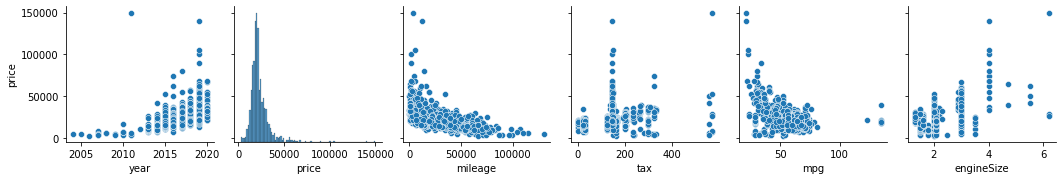

In [6]:
sns.pairplot(df, y_vars="price")
plt.show()

In [7]:
df.nunique()

model             21
year              17
price            776
transmission       3
mileage         1428
fuelType           3
tax               26
mpg               77
engineSize        16
dtype: int64

# Data Transformation

In [8]:
def to_one_hot(df, column):
    # pop columna and get a list of unique values
    column_val = df.pop(column)
    unique_values = set(column_val)
    
    # for each value append new feature column
    for value in unique_values:
        df[(column + "_" + str(value)).lower().replace(" ", "").replace("-", "_")] = column_val == value

In [9]:
to_one_hot(df, "model")
to_one_hot(df, "transmission")
to_one_hot(df, "fuelType")
df

,year,price,mileage,tax,mpg,engineSize,model_slk,model_glbclass,model_sclass,model_claclass,model_eclass,model_bclass,model_glaclass,model_aclass,model_gclass,model_cclass,model_vclass,model_gleclass,model_clclass,model_slclass,model_mclass,model_glclass,model_clcclass,model_x_class,model_glcclass,model_glsclass,model_clsclass,transmission_automatic,transmission_semi_auto,transmission_manual,fueltype_hybrid,fueltype_petrol,fueltype_diesel
0,2005,5200,63000,325,32.100,1.800,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,2017,34948,27000,20,61.400,2.100,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
2,2016,49948,6200,555,28.000,5.500,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,2016,61948,16000,325,30.400,4.000,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,2016,73948,4000,325,30.100,4.000,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,2018,21996,32095,145,46.300,2.100,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1498,2018,19346,34483,150,46.300,2.100,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1499,2019,20391,18812,150,48.700,2.100,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1500,2019,20995,6587,145,40.900,1.600,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [10]:
one_hot_features = [
    "model_clsclass", "model_glclass", "model_bclass", "model_slclass",
    "model_claclass", "model_gclass", "model_gleclass", "model_aclass",
    "model_mclass", "model_glbclass", "model_eclass", "model_glcclass",
    "model_slk", "model_glsclass", "model_x_class", "model_clcclass",
    "model_vclass", "model_glaclass", "model_clclass", "model_sclass", "model_cclass",
    "transmission_manual", "transmission_automatic", "transmission_semi_auto",
    "fueltype_hybrid", "fueltype_diesel", "fueltype_petrol"]

df[one_hot_features].sum()

model_clsclass              48
model_glclass               10
model_bclass                60
model_slclass               31
model_claclass               4
model_gclass                 4
model_gleclass              79
model_aclass               274
model_mclass                19
model_glbclass               3
model_eclass               195
model_glcclass             113
model_slk                   12
model_glsclass              11
model_x_class                4
model_clcclass               1
model_vclass                39
model_glaclass             123
model_clclass               61
model_sclass                39
model_cclass               372
transmission_manual        158
transmission_automatic     306
transmission_semi_auto    1038
fueltype_hybrid             19
fueltype_diesel           1159
fueltype_petrol            324
dtype: int64

# Normalization

In [11]:
features = ["year", "mileage", "tax", "mpg", "engineSize"]

df[features] = (df[features] - df[features].mean()) / df[features].std()
df["price"] = (df["price"] - df["price"].mean()) / df["price"].std()

# Train/Test Split

In [12]:
features = features + one_hot_features

X = df[features].values.astype(np.float32)
y = df["price"].values.astype(np.float32)

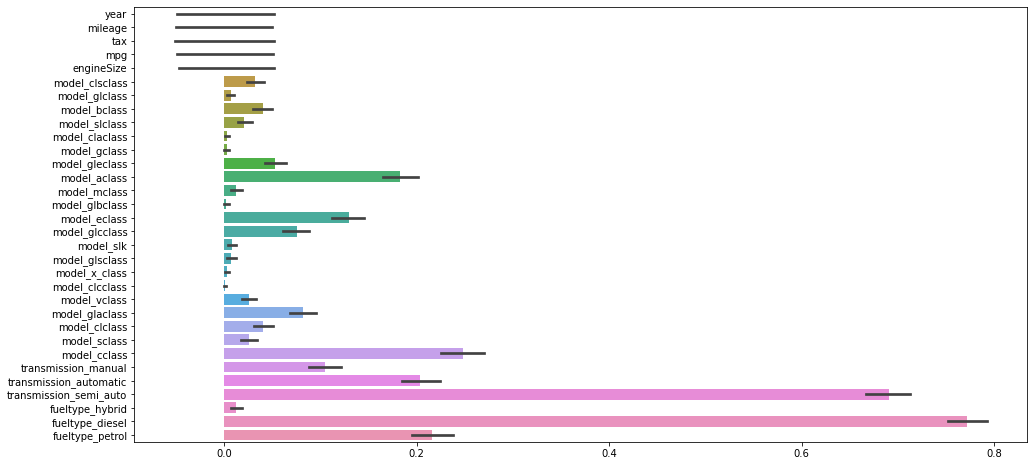

In [13]:
sns.barplot(data=df[features], orient="h")
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train.shape, y_test.shape

((1201,), (301,))

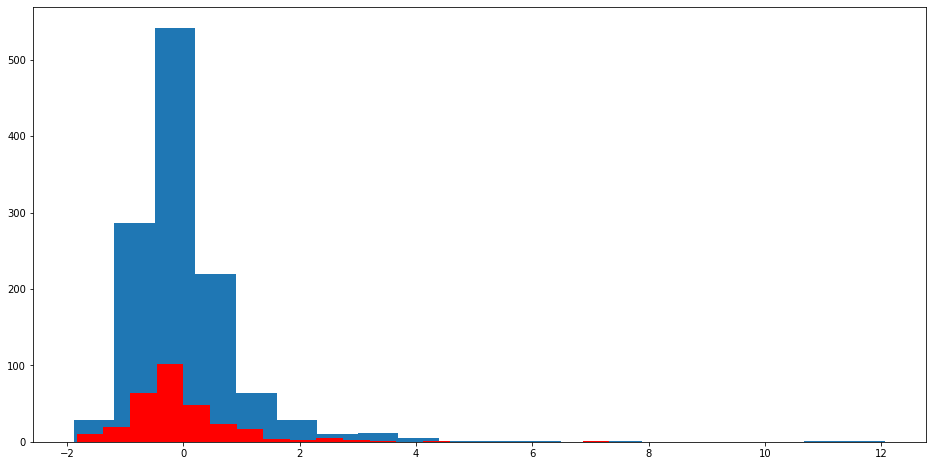

In [15]:
plt.hist(y_train, bins=20)
plt.hist(y_test, bins=20, color="red")
plt.show()

# Prediction

## Linear Regression

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Train score:\t", lr.score(X_train, y_train))
print("Train score:\t", lr.score(X_test, y_test))

Train score:	 0.7186203791333914
Train score:	 0.7740185209389832


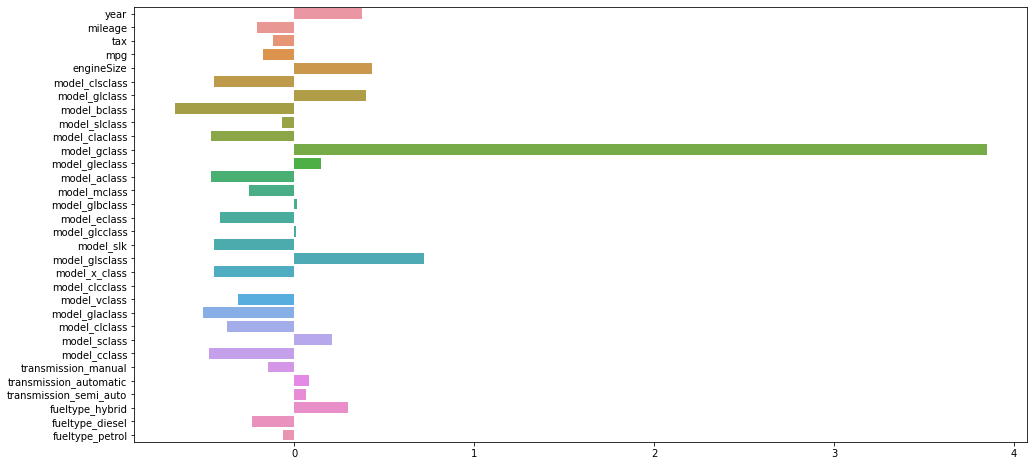

In [17]:
sns.barplot(y=features, x=lr.coef_)
plt.show()

## ElasticNet

In [18]:
parametersGrid = {
    "alpha": [0.01, 0.1, 1, 10, 100],
    "l1_ratio": [0.01, 0.01, 0.25, 0.5, 0.75, 0.9, 0.99]}

eNet = ElasticNet()
grid = GridSearchCV(eNet, parametersGrid, scoring="r2", cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_estimator_)

print("Train score:\t", grid.score(X_train, y_train))
print("Train score:\t", grid.score(X_test, y_test))

ElasticNet(alpha=0.01, l1_ratio=0.01)
Train score:	 0.6852245048682626
Train score:	 0.776657413650059


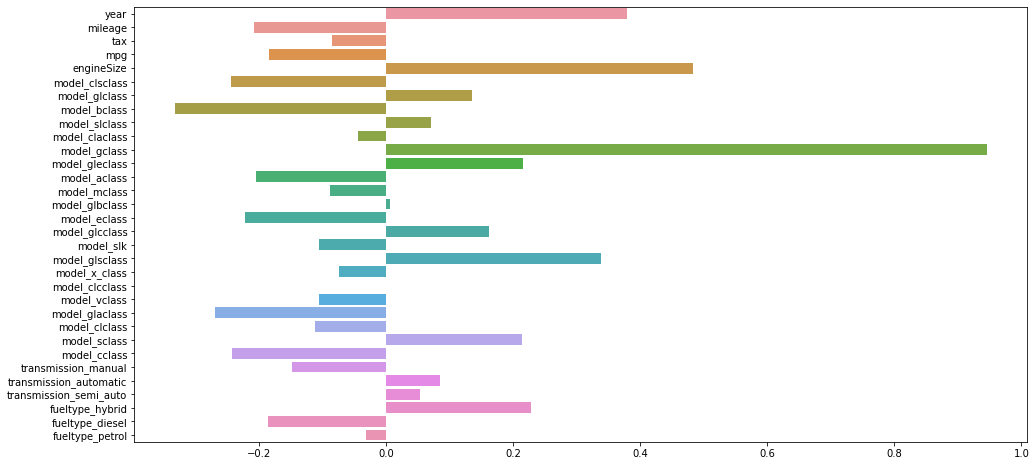

In [19]:
sns.barplot(y=features, x=grid.best_estimator_.coef_)
plt.show()

## Decision Tree Regressor

In [20]:
parametersGrid = {
    "criterion" : ["friedman_mse"],
    "splitter" : ["best"],
    "max_depth": [5, 10, 15],
    "min_samples_split": [10, 20],
    "min_samples_leaf": [5]}

dtr = DecisionTreeRegressor()
grid = GridSearchCV(dtr, parametersGrid, scoring="r2", cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_estimator_)

print("Train score:\t", grid.score(X_train, y_train))
print("Train score:\t", grid.score(X_test, y_test))

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15,
                      min_samples_leaf=5, min_samples_split=20)
Train score:	 0.7745316622150027
Train score:	 0.8245019992059588
